# INF8460: Traitement automatique de la langue naturelle

# TP1: Comparaison d'algorithmes pour classification de texte

## Identification de l'équipe:

### Groupe de laboratoire: 

### Equipe numéro : 

### Membres: 

- membre 1 (% de contribution, nature de la contribution)
- membre 2 (% de contribution, nature de la contribution)
- membre 3 (% de contribution, nature de la contribution)

* nature de la contribution: Décrivez brièvement ce qui a été fait par chaque membre de l’équipe. Tous les membres sont censés contribuer au développement. Bien que chaque membre puisse effectuer différentes tâches, vous devez vous efforcer d’obtenir une répartition égale du travail. 


## Description:

Dans ce premier TP, vous explorerez les bases du traitement automatique du langage naturel. Au cours de ce travail, vous appliquerez concrètement les concepts enseignés en classe pour résoudre une tâche de classification simple. De plus, le processus ressemblera à la manière dont vous aborderiez ce type de problème dans le monde réel. Tout au long de ce laboratoire, vous vous familiariserez avec des bibliothèques couramment utilisées en NLP ainsi qu'en science des données.

Dans ce laboratoire, vous travaillerez avec un jeu de données comprenant des évaluations de produits provenant d'Amazon. Pour chaque évaluation, le jeu de données contient trois informations : le titre fourni par l'utilisateur, le commentaire détaillé et le nombre d'étoiles attribué par l'utilisateur au produit.

L'objectif de cette tâche consistera à prédire le nombre d'étoiles attribué à une évaluation à partir du commentaire et du titre qui lui sont associés.

Le travail sera divisé en 3 parties:

    - Chargement, prétraitement et visualisation des données: Dans cette première partie, vous allez charger et prétraiter les données afin qu'elles soient prêtes à être utilisées par les algorithmes lors de la deuxième partie.
    - Classification: Cette partie consistera à explorer les différents algorithmes pouvant être appliqués à cette tâche. Vous ferez aussi une analyse des sorties du classificateur bayésien naïf.
    - Amélioration de modèle: Cette dernière partie consistera à améliorer votre modèle de 2 façons différentes. D'abord, vous ferez une recherche d'hyper-paramètres avec de la validation croisée en utilisant un GridSearch. Ensuite, vous ferez de l'extraction d'attributs avec l'aide de ChatGPT afin de d'entrainer un nouveau modèle et de comparer ainsi une représentation de type "Bag of words" et une représentation avec attributs spécifiques. 




## 1. Chargement, prétraitement et visualisation des données

Dans cette première partie, vous allez charger et prétraiter les données afin qu'elles soient prêtes à être utilisées par les algorithmes lors de la deuxième partie.


### 1.1 Charger les données

Ce numéro doit être résolu en utilisant la bibliothèque **pandas**.

#### 1.1.1 Charger le jeu de données 

Chargez le jeu de données amazon_rating.csv. Affichez ensuite son contenu.


In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("amazon_rating.csv")

In [3]:
data

,title,text,rating
0,Five Stars,good as any name brand,5
1,Did The Job,Ordered on accident when I had searched for RE...,3
2,Great product,I was looking for something to read on and thi...,5
3,Leaking Acid EVERYEWHERE!!,After 2nd recharge and use all but 3 are leaki...,1
4,One Star,They fail earlier than brand names. I assumed ...,1
...,...,...,...
2788,Three Stars,Weird but some didn't last long as they should,3
2789,Good for kids but SLOW,"A good starter tablet, but very very slow. Don...",3
2790,good tablet to star,is a God tablet but the camera could be a litt...,3
2791,Just decent tablet,Not many apps. The first one was already retur...,3


#### 1.1.2 Fusionner les colonnes title et text en une seule colonne

Afin de faciliter la tâche pour le reste du TP, nous allons fusionner ces deux colonnes afin que nous n'ayons qu'un seul texte à considérer lors de la vectorisation.

Afin de s'assurer de l'intégrité des textes, fusionnez-les à l'aide d'un espace. Par exemple, une évaluation ayant le titre "Five Stars" et le commentaire "good as any name brand" aura comme texte final "Five Stars good as any name brand".

Stockez le résultat dans la colonne "text" et supprimez la colonne "title".

In [4]:
data.text = data.title + ". " + data.text 

### 1.2 Prétraitement des données

En utilisant la librairie nltk, implémentez la fonction suivante qui :

- Enlève les majuscules.
- Enlève les caractères de ponctuation.
- Segmente la séquence en entrée en une liste de jetons (tokenization).
- Enlève les "stopwords"
- Effectue la racinisation.
- Retourne l'ensemble des jetons de la séquence
    

In [41]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re

stopwords = stopwords.words('english')
stemmer = nltk.stem.porter.PorterStemmer()
#lemmer = nltk.stem.wordnet.WordNetLemmatizer()


def preprocess(sentence):
    """
    Fonction qui transforme une chaine de caractère en liste de jetons.
    Les pre-traitements à implémenter sont: 
    1. Enlever les majuscules
    2. Enlever les caractères de ponctuations
    3. Séparer la chaine de caractères en une liste de jetons (tokenization) 
    4. Enlever les stopwords
    5. Stemming (racinisation)
    
    :param sentence: une chaine de caractère
    :return: la liste de jetons
    """ 
    sentence = sentence.lower()
    sentence = re.sub(r'[^\w\s]', ' ', sentence)
    tokens = word_tokenize(sentence)
    tokens = [token for token in tokens if token not in stopwords]
    
    tokens = [stemmer.stem(token) for token in tokens]
    
    return tokens

In [6]:
"""
NE PAS MODIFIER

Le code suivant appliquera votre fonction sur tous les exemples. Il gardera aussi une version originale pour une analyse future.
"""

data["text_original"] = data["text"]
data["text"] = data["text"].apply(preprocess)


### 1.3 Visualisation des données

**Utilisez la bibliothèque matplotlib pour les graphiques.** Vous pouvez utiliser n'importe quelle classe de base de Python, par exemple collections.Counter, qui sera utile pour l'affichage des jetons.

La colonne "rating" contient le nombre d'étoiles associé l'évaluation d'un utilisateur. Le nombre d'étoiles varie entre 1 et 5.

Afin de simplifier la tâche de classification, nous avons enlevé les commentaires ayant 2 et 4 étoiles du jeu de données. Cela signifie qu'il y a trois catégories de commentaires, c'est-à-dire ceux ayant 1, 3 ou 5 étoiles.

Affichez dans un graphique :

- Le nombre d'exemples présents dans le jeu de données par catégorie.
- La quantité moyenne de jetons par exemple selon la catégorie.


#### 1.3.1  Afficher dans un graphique le nombre d'exemples présents dans le jeu de données pour chaque catégorie

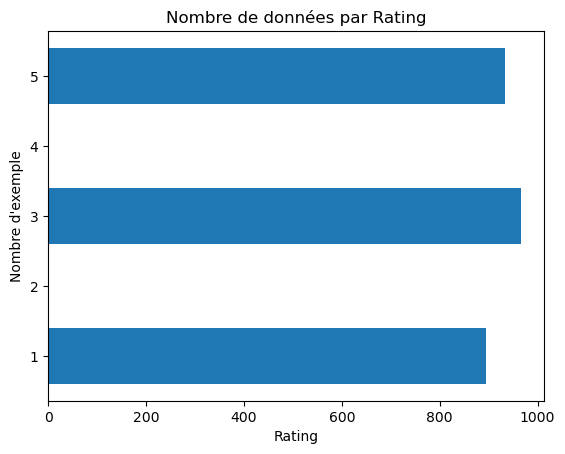

In [7]:
import matplotlib.pyplot as plt

data["n_tokens"] = data["text"].apply(len)
count = data[["rating", "n_tokens"]].groupby("rating").count()
count

fig, ax = plt.subplots()
ax.barh(count.index.tolist(), count.n_tokens.tolist())
plt.title("Nombre de données par Rating")
plt.xlabel("Rating")
plt.ylabel("Nombre d'exemple")
plt.show()

#### 1.3.2 Afficher dans un graphique la quantité moyenne de jetons par exemple selon la catégorie

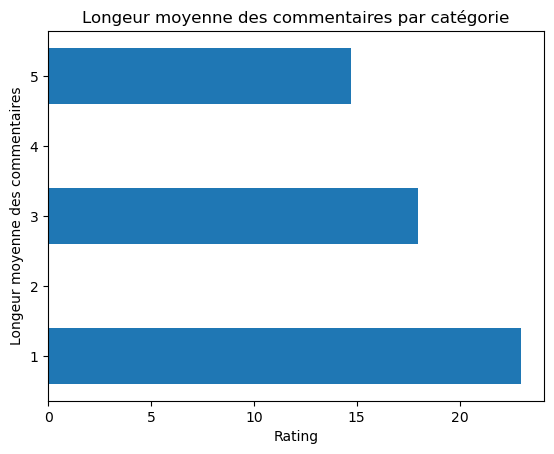

In [8]:
count = data[["rating", "n_tokens"]].groupby("rating").mean()
count

fig, ax = plt.subplots()
ax.barh(count.index.tolist(), count.n_tokens.tolist())
plt.title("Longeur moyenne des commentaires par catégorie")
plt.xlabel("Rating")
plt.ylabel("Longeur moyenne des commentaires")
plt.show()

#### 1.3.3 Afficher en texte les top 10 jetons les plus fréquents par catégorie.


Affichez en texte les 10 jetons les plus fréquents selon la catégorie.


In [9]:
from collections import Counter


def print_most_commons(data, column):
    for i in data.rating.unique():
        top_vocab = Counter([x  for y in data[data.rating == i][column].tolist() for x in y])
        keys, n = list(zip(*top_vocab.most_common(20)))
        print(f"Top Vocab for rating {i}: ")
        for j in range(10):
            print(f"\t{keys[j]}: {n[j]}")

print_most_commons(data, "text")
            


Top Vocab for rating 5: 
	great: 618
	tablet: 393
	batteri: 382
	love: 307
	good: 261
	price: 248
	use: 212
	star: 182
	five: 181
	work: 168
Top Vocab for rating 3: 
	batteri: 459
	tablet: 380
	good: 363
	use: 247
	last: 242
	price: 231
	great: 230
	three: 193
	long: 189
	star: 186
Top Vocab for rating 1: 
	batteri: 1224
	last: 406
	one: 346
	use: 330
	amazon: 324
	work: 269
	buy: 236
	star: 181
	purchas: 163
	week: 160


#### 1.3.4 Afficher en texte les top 10 adjectifs les plus fréquents selon la catégorie. 

Pour cet exercice, vous devrez utiliser la fonction [nltk.pos_tag](https://www.nltk.org/book/ch05.html) et retenir les jetons identifiés comme JJ.
 
Pour obtenir de bons résultats, le tagger [nltk.pos_tag](https://www.nltk.org/book/ch05.html) doit être exécuté sur le texte original, incluant les stopwords. 
Vous devrez donc partir des évaluations originales. Pour vous simplifier la tâche, utilisez 
le tokenizer *word_tokenize* provenant de nltk.

**Les adjectifs sont les jetons identifiés comme JJ.**

In [11]:
from nltk.tokenize import word_tokenize


def get_tokens(x):
    tokens = nltk.pos_tag(word_tokenize(x))
    filtered_tokens = list(filter(lambda token: token[1] in ["JJ"], tokens))
    
    return list(map(lambda x: x[0], filtered_tokens))

data["adjectives"] = data["text_original"].apply(get_tokens)

print_most_commons(data, "adjectives")
        
data = data.drop(columns="adjectives")

Top Vocab for rating 5: 
	great: 260
	good: 175
	old: 90
	easy: 83
	Good: 75
	other: 64
	last: 58
	Great: 52
	Excellent: 37
	long: 36
Top Vocab for rating 3: 
	good: 239
	last: 201
	great: 132
	Good: 110
	other: 82
	old: 63
	little: 62
	slow: 56
	ok: 49
	long: 45
Top Vocab for rating 1: 
	last: 259
	good: 102
	dead: 96
	other: 83
	few: 72
	same: 66
	bad: 65
	new: 62
	first: 53
	long: 46


### 1.4 Diviser les données en ensembles d'entraînement et de test. 

À l'aide de la fonction [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) de SKlearn, séparez les données en ensembles d'entraînement (67% des données) et de test (33% des données). Gardez les deux ensembles dans 2 variables.

In [12]:
from sklearn.model_selection import train_test_split


train, test = train_test_split(data, test_size=0.33, random_state=42)


In [13]:
train

,title,text,rating,text_original,n_tokens
2788,Three Stars,"[three, star, weird, last, long]",3,Three Stars. Weird but some didn't last long a...,5
2353,Great first tab,"[great, first, tab, great, first, tab, game, p...",5,Great first tab. Great first tab for game play...,17
718,Three Stars,"[three, star, batteri]",3,Three Stars. They're batteries.,3
366,"Good Batteries, Better Deal","[good, batteri, better, deal, expect, less, pe...",5,"Good Batteries, Better Deal. I was expecting l...",15
2190,they worked fine - I think these just don't la...,"[work, fine, think, last, almost, review, righ...",3,they worked fine - I think these just don't la...,48
...,...,...,...,...,...
1638,Almost,"[almost, bought, daughter, bundl, solid, bumpe...",3,Almost. I bought this for my daughter. It was ...,19
1095,Three Stars,"[three, star, hold, charg]",3,Three Stars. They hold there charge!,4
1130,Three Stars,"[three, star, goog]",3,Three Stars. Goog,3
1294,"A great deal, and the batteries have a good li...","[great, deal, batteri, good, life, great, deal...",5,"A great deal, and the batteries have a good li...",14


### 1.5 Construction du vocabulaire

Dans un modèle Bag-of-Words (BoW), un vocabulaire est prédéterminé à partir de l'ensemble d'entraînement. Seuls les mots faisant partie de ce vocabulaire seront considérés pour la suite.

Complétez la fonction **build_voc** qui retourne une liste de jetons qui sont présents au moins n fois (threshold passé en paramètre) dans la liste d'exemples (également passée en paramètre). Vous pouvez utiliser la classe Counter.

Ensuite, appelez cette fonction pour construire votre vocabulaire.

In [14]:
from collections import Counter 

def build_voc(documents, threshold):
    vocabulary = Counter(documents.sum())
    return [word for word, n_occurence in vocabulary.items() if n_occurence >= threshold]

voc = build_voc(train["text"], 2)

### 1.6 Vectorisation des données

À l'aide de la classe [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) de Sklearn, transformez l'ensemble de jetons en matrice de co-occurence utilisant TF-IDF.

Utilisez le vocabulaire construit au numéro précédent dans votre matrice de co-occurrence (voir le paramètre vocabulary de TfidfVectorizer). 

**Faites attention:** Il ne faut pas entrainer (fit) la vectorisation sur l'ensemble de test

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import mean_squared_error

vectorizer = TfidfVectorizer(tokenizer = lambda x: x, lowercase=False, vocabulary = voc)
X_train = vectorizer.fit_transform(train["text"])
X_test = vectorizer.transform(test["text"])

y_train = train["rating"]
y_test = test["rating"]

C:\Users\azoua\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


## 2. Classification

Maintenant que les données sont prêtes à être utilisées par nos modèles, nous allons entrainer et tester différent types de modèles sur le jeu de données afin d'en faire la comparaison. 

Cette section sera divisé en cinq modèle:
   - Modèle aléatoire (Random baseline)
   - Classificateur bayésien naïf
   - Régression Logistique
   - Multi-Layer Perceptron (MLP)

### 2.1 Random baseline

Un seuil (baseline) est un modèle servant de référence et dont les performances représentent un seuil à dépasser.

Générez ce seuil en effectuant des prédictions aléatoires parmi les valeurs 1, 3 et 5.

Ensuite, affichez les mesures de performance : précision, rappel (recall) et F1. 

In [16]:
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error

y_pred_random = np.random.choice([1,3,5], size=len(y_test))

In [17]:
print("Résultats pour un Random baseline")
print(classification_report(y_test, y_pred_random, digits=4))

Résultats pour un Random baseline
              precision    recall  f1-score   support

           1     0.3059    0.3079    0.3069       302
           3     0.3824    0.3472    0.3639       337
           5     0.3173    0.3498    0.3328       283

    accuracy                         0.3351       922
   macro avg     0.3352    0.3350    0.3345       922
weighted avg     0.3374    0.3351    0.3357       922



a) Comment pouvez-vous expliquer le F1-score obtenu?

> Oui, étant donné que les classes sont équilibrées, le résultat devrait être 1/3

### 2.2 Analyse et compréhension d'un classificateur bayésien naïf (NB)

Naive Bayes (NB) est un algorithme très simple pouvant servir de bon point de départ (baseline) pour les tâches de classification. Ce numéro portera sur l'analyse de ce modèle afin de bien comprendre son comportement.

#### 2.2.1 Construction du modèle

Commencez d'abord par construire le modèle à l'aide de la classe MultinomialNB de SKlearn. Utilisez les données vectorisées produites en 1.6.

Affichez les performances de votre classificateur (précision, recall, F1-score).

In [18]:
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)

In [19]:
print("Résultats pour Classificateur bayésien naïf")
print(classification_report(y_test, y_pred_nb, digits=4))

Résultats pour Classificateur bayésien naïf
              precision    recall  f1-score   support

           1     0.8624    0.8510    0.8567       302
           3     0.7947    0.7122    0.7512       337
           5     0.7702    0.8763    0.8198       283

    accuracy                         0.8080       922
   macro avg     0.8091    0.8132    0.8092       922
weighted avg     0.8094    0.8080    0.8068       922



####  2.2.2 Matrice de confusion

Visualisez la matrice de confusion de votre modèle en utilisant la fonction [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) de seaborn. Celle-ci peut prendre en entrée une matrice de confusion comme celle fournie par la fonction [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) dans SKLearn.

[Text(0, 0.5, '1'), Text(0, 1.5, '3'), Text(0, 2.5, '5')]

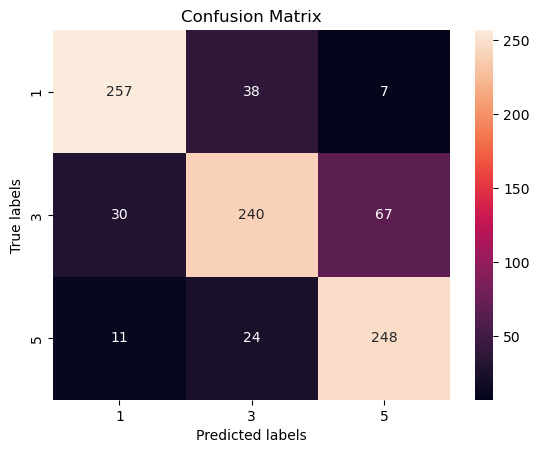

In [20]:
from sklearn.metrics import confusion_matrix

import seaborn as sns

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred_nb, labels=nb_classifier.classes_), annot=True, fmt='g', ax=ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(nb_classifier.classes_); ax.yaxis.set_ticklabels(nb_classifier.classes_)

####  2.2.3 Visualisation des probabilités de NB

Naive Bayes est un classificateur suivant une approche générative. Durant son entraînement, il apprend les probabilités P(x_i|y). En utilisant le théorème de Bayes, on peut exprimer la probabilité d'une classe donnée y étant donné un ensemble de caractéristiques x_1, x_2, ..., x_n comme suit : 

$$ P(y|x_1, x_2, ..., x_n) = P(y) * P(x_1|y) * P(x_2|y) * ... * P(x_n|y) $$

Ainsi, étant donné un exemple ayant le jeton x_i, plus la probabilité P(x_i|y) est élevée pour une classe, plus la probabilité que l'exemple provienne de cette classe augmente.

Écrivez du code permettant de visualiser les jetons ayant les plus grandes probabilités selon la classe dans un graphique de type [barh](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.barh.html). Consultez la documentation de [MultiNomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) afin de trouver les probabilités P(x_i|y). Le graphique produit devrait avoir les 10 jetons associés au P(x_i|y) le plus grand selon y. L'axe des x devrait être la valeur des probabilités.

Ce code devra être sous forme d'une fonction où on passe la classe y en paramètre.


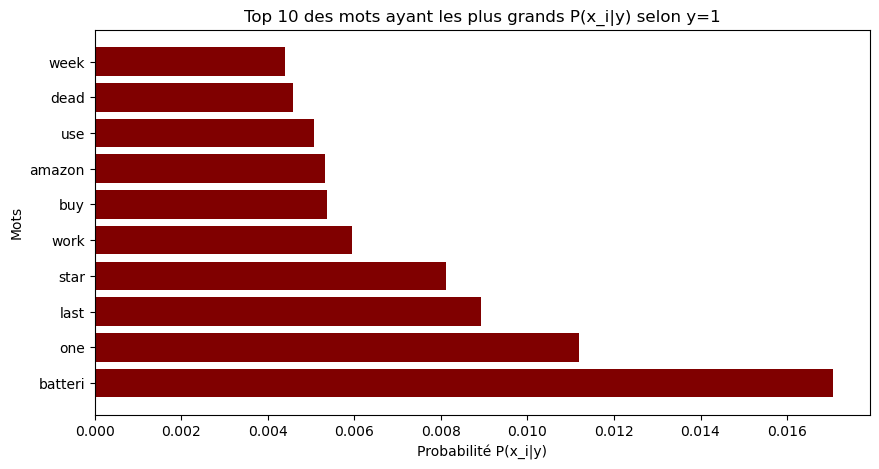

In [21]:
import matplotlib.pyplot as plt


features = (-nb_classifier.feature_log_prob_).argsort(axis=1)
indices = vectorizer.get_feature_names_out()
f = lambda x: indices[x]

fig = plt.figure(figsize=(10, 5))

def plot_features(y):

    # creating the bar plot
    plt.rcParams["figure.figsize"] = (15,10)
    plt.barh(f(features)[y-1,:10], np.exp(nb_classifier.feature_log_prob_[y-1][features[y-1,:10]]), color='maroon')

    plt.xlabel("Probabilité P(x_i|y)")
    plt.ylabel("Mots")
    plt.title(f"Top 10 des mots ayant les plus grands P(x_i|y) selon y={y}")
    plt.show()
    
plot_features(1)


a) Les données que vous affichez ont-elles du sens? Comment pouvez-vous le valider?

> Oui, cela correspond avec les résultats de 1.3. C"EST-A DIRE?

#### 2.2.4 Visualisation des erreurs commises

Trouvez toutes les phrases dont la vraie valeur est 5 mais la valeur prédite est de 1.

Affichez ces exemples d'une manière lisible.


In [44]:
bad_predictions = test[(y_test == 5) & (y_pred_nb == 1)]

In [45]:
print("\n\n".join(bad_predictions["text_original"]))

The batteries appear to be working great. I've been using two AA's in my Xbox .... The batteries appear to be working great. I've been using two AA's in my Xbox One controller for over a month now. If you can get a sale on these like I did, buy, buy, buy!

Just as good as any other batteries on the shelf!. What can I say - they work and last just as good as any other brand I have tried. I bought various sizes from Amazon and they all work great - just make sure you buy in advance to have them on hand for when you need them instead of running to the store forking over a lot more money for the same performance - I did buy the 9 volt box to replace all my fire alarms in the house - PERFECT!

For what they are, great buy!. It's not a high discharge battery, but for typical uses such wireless mouse and flashlights, these are great.

They sure are batteries.... They're batteries and they come charged and ready to go, there is not much of a review you can write about batteries. They power my 

#### 2.2.5 Analyse d'erreurs commises

Complétez la fonction plot_example qui:
   - Prends en entrée une liste de jetons provenant d'un exemple. 
   - Produit un graphique qui pour chaque jeton, affiche la valeur P(x_i|y=5) et P(x_i|y=1)
    
**Pour vous faciliter le travail, utiliser barh de pandas et non de matplotlib**: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.barh.html


Utilisez la fonction avec une phrase au choix dont la vraie valeur est 5 mais la valeur prédite est de 1.

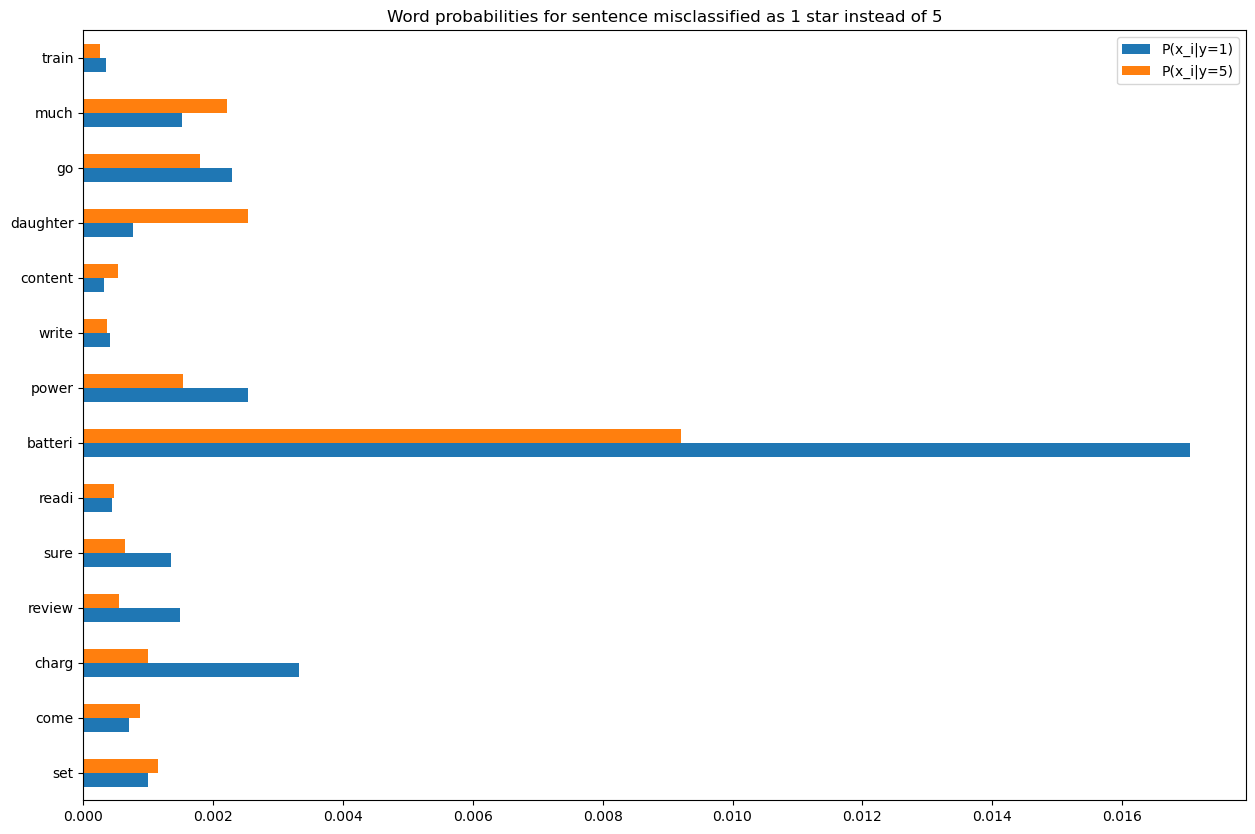

In [24]:
def plot_example(words):
    word_to_index = {n: i for i, n in enumerate(vectorizer.get_feature_names_out())}
    words = list(set([word for word in words if word in word_to_index]))
    indices = [word_to_index[word] for word in words ]

    rating_1_ = np.exp(nb_classifier.feature_log_prob_[0][indices])
    rating_2_ = np.exp(nb_classifier.feature_log_prob_[2][indices])
    index = words
    df = pd.DataFrame({'P(x_i|y=1)': rating_1_,
                        'P(x_i|y=5)': rating_2_}, index=index)
    ax = df.plot.barh(title=f"Word probabilities for sentence misclassified as 1 star instead of 5", figsize=(15,10))

plot_example(bad_predictions.iloc[3]["text"])

a) Suite à cette analyse, pouvez-vous voir une tendance dans les exemples qui sont prédits comme faisant partie de la classe 1 mais faisant réellement partie de la classe 5 ?

>  Oui, le jeton batteri est souvent présent dans les exemples mal classifiés

### 2.3 Régression logistique

Entrainez un modèle de [régression logistique](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) à l'aide de SKLearn en utilisant les données produites en 1.6 et affichez sa performance avec les mêmes métriques que précédemment. 

In [25]:
from sklearn.linear_model import LogisticRegression


lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_test)



In [26]:
print("Résultats pour Régression Logistique")
print(classification_report(y_test, y_pred_lr, digits=4))

Résultats pour Régression Logistique
              precision    recall  f1-score   support

           1     0.8885    0.8709    0.8796       302
           3     0.7906    0.7953    0.7929       337
           5     0.8293    0.8410    0.8351       283

    accuracy                         0.8341       922
   macro avg     0.8361    0.8357    0.8359       922
weighted avg     0.8345    0.8341    0.8342       922



## 2.3 MLP

Entrainez un modèle neuronal de type [Multi-layer Perceptron classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) à l'aide de SKLearn en utilisant les données produites en 1.6. Affichez sa performance avec les mêmes métriques que précédemment. 

In [27]:
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=1, max_iter=50)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)



C:\Users\azoua\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [28]:
print("Résultats pour MLP")
print(classification_report(y_test, y_pred_mlp, digits=4))

Résultats pour MLP
              precision    recall  f1-score   support

           1     0.8608    0.8808    0.8707       302
           3     0.7934    0.7864    0.7899       337
           5     0.8315    0.8198    0.8256       283

    accuracy                         0.8275       922
   macro avg     0.8286    0.8290    0.8287       922
weighted avg     0.8272    0.8275    0.8273       922



## 3. Amélioration de modèle

Cette dernière partie consistera à améliorer votre modèle de deux façons différentes.

Tout d'abord, vous effectuerez une recherche d'hyper-paramètres avec une validation croisée en utilisant une grille de recherche (GridSearch). Ensuite, vous réaliserez de l'extraction d'attributs (feature extraction) afin d'entraîner un nouveau modèle en utilisant ces hyper-paramètres optimaux.

###  3.1 Recherche d'hyper-paramètres et validation croisée

La classe [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) permet d'explorer toutes les combinaisons possibles d'hyper-paramètres que l'on spécifie afin de trouver la configuration optimale. De plus, il est tout à fait possible de fusionner les paramètres du pré-traitement et ceux du classificateur en utilisant la classe [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html).

Pour la rédaction de votre code, vous avez la possibilité de vous référer au tutoriel du cours.

Dans cette phase, l'objectif est de découvrir une configuration optimale pour le modèle LogisticRegression en conjonction avec la technique de vectorisation TF-IDF. Cette recherche devra être guidée par la métrique du F1-score pondéré (weighted F1). Vous devrez aussi effectuer une exploration de paramètres sur au moins deux attributs liés à TF-IDF et deux paramètres de la régression logistique.

Affichez ensuite la performance finale du modèle optimal ainsi que ses paramètres.

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier




X_train_grid = [" ".join(s) for s in train["text"].tolist()]
X_test_grid = [" ".join(s) for s in test["text"].tolist()]


param_grid = {    'tfidf__ngram_range': [(1, 1), (1, 2)],   
                    'logreg__C': [0.1, 1, 10],                  
                    'logreg__penalty': ['l1', 'l2']  
             }

pipe = Pipeline([('tfidf', TfidfVectorizer(smooth_idf=True, norm=None, tokenizer=lambda x: x.split(" "))), 
                 ('logreg', LogisticRegression())])

f1 = make_scorer(f1_score , average='weighted')

grid = GridSearchCV(pipe, cv=5,scoring=f1, param_grid=param_grid, n_jobs=-1)
grid.fit(X_train_grid, y_train)
logreg2_preds = grid.predict(X_test_grid)

print("Résultats pour Régression Logistique")
print(classification_report(y_test, logreg2_preds, digits=4))

print()
print("Meilleur parameters")
print(grid.best_params_)

C:\Users\azoua\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\azoua\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\azoua\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\azoua\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 420, in fit
    self._final_estimator.fit

Résultats pour Régression Logistique
              precision    recall  f1-score   support

           1     0.9178    0.8874    0.9024       302
           3     0.8232    0.8012    0.8120       337
           5     0.8245    0.8799    0.8513       283

    accuracy                         0.8536       922
   macro avg     0.8552    0.8562    0.8552       922
weighted avg     0.8546    0.8536    0.8537       922


Meilleur parameters
{'logreg__C': 0.1, 'logreg__penalty': 'l2', 'tfidf__ngram_range': (1, 2)}


a) Quels sont les attributs que vous avez choisis et quels sont leurs valeurs optimales?

> Description des paramètres

###  3.2 Extraction d'attributs (Feature extraction) avec ChatGPT

ChatGPT peut être très utile pour donner des idées ou donner du squelette de code. Afin de prouver cela, demandez à ChatGPT de générer du code permettant d'extraire des attributs (feature extraction) à partir du texte des évaluations.

En utilisant ChatGPT ainsi que votre recherche personnelle, essayez de déterminer un ensemble d'attributs que vous pourriez utiliser pour représenter chaque évaluation. Indiquez dans la cellule ci-dessous les descriptions d'attributs suggérées par ChatGPT ainsi que les vôtres. Différenciez clairement vos attributs - s'il y en a - de ceux de ChatGPT.


> *Entrez votre réponse ici*

Indiquez ci-dessous le code généré par ChatGPT que vous avez décidé de conserver pour représenter chaque évaluation. Implémentez ces attributs sous forme de fonction qui vous retourne, pour un document, un dictionnaire d'attributs et de leurs valeurs. N'oubliez pas d'indiquer votre propre code s'il y en a.

Il se peut que le code généré ait besoin d'être adapté à notre jeu de données. Si c'est le cas, corrigez le code et affichez la version avant et après vos correction.

In [30]:

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import re
from datetime import datetime

nltk.download('punkt')
nltk.download('vader_lexicon')

def extract_textual_features(review_text):
    # Textual features
    word_count = len(review_text.split())
    sentence_count = len(nltk.sent_tokenize(review_text))
    average_word_length = sum(len(word) for word in review_text.split()) / word_count
    
    # Sentiment features
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = sia.polarity_scores(review_text)
    sentiment_label = 1 if sentiment_scores['compound'] > 0 else 0 if sentiment_scores['compound'] < 0 else 0.5
    
    tb_blob = TextBlob(review_text)
    sentiment_polarity = tb_blob.sentiment.polarity
    sentiment_subjectivity = tb_blob.sentiment.subjectivity
        
    # Language and structure features
    grammar_errors = len(re.findall(r'\b[a-zA-Z]+(?<![a-zA-Z])', review_text))
    sentence_structure = 1 if len(nltk.word_tokenize(review_text)) / sentence_count > 20 else 0
    
    # User interaction features
    review_length = 0 if word_count <= 50 else 0.5 if 50 < word_count <= 200 else 1
    
    # Contextual features
    
    # Return the extracted features as a dictionary
    features = {
        'word_count': word_count,
        'sentence_count': sentence_count,
        'average_word_length': average_word_length,
        'sentiment_label': sentiment_label,
        'sentiment_polarity': sentiment_polarity,
        'sentiment_subjectivity': sentiment_subjectivity,
        'grammar_errors': grammar_errors,
        'sentence_structure': sentence_structure,
        'review_length': review_length,
    }
    
    return features

# Example usage
review_text = "This product exceeded my expectations. I'm very satisfied with its performance."
review_title = "Great product!"
rating = "5"
review_date = "2023-08-15"
verified_purchase = "Yes"

features = extract_textual_features(review_text)
print(features)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\azoua\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\azoua\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'word_count': 11, 'sentence_count': 2, 'average_word_length': 6.2727272727272725, 'sentiment_label': 1, 'sentiment_polarity': 0.65, 'sentiment_subjectivity': 1.0, 'grammar_errors': 0, 'sentence_structure': 0, 'review_length': 0}


Utilisez votre code ci-dessus pour entrainer un modèle avec votre nouvelle représentation des évaluations. Affichez sa performance.

In [37]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

train_features = train["text_original"].apply(extract_textual_features)
test_features = test["text_original"].apply(extract_textual_features)

X_train_features = pd.DataFrame(train_features.tolist())
X_test_features = pd.DataFrame(test_features.tolist())

# Standardize the feature values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_features)
X_test_scaled = scaler.transform(X_test_features)


# Train a Logistic Regression classifier
feature_classifier = MLPClassifier(random_state=1, max_iter=200)
feature_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_feature = feature_classifier.predict(X_test_scaled)


C:\Users\azoua\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [38]:
print("Performance with extracted features")
print(classification_report(y_test, y_pred_feature, digits=4))

Performance with extracted features
              precision    recall  f1-score   support

           1     0.7669    0.7517    0.7592       302
           3     0.5791    0.5104    0.5426       337
           5     0.6535    0.7597    0.7026       283

    accuracy                         0.6659       922
   macro avg     0.6665    0.6739    0.6681       922
weighted avg     0.6635    0.6659    0.6627       922



### 3.3 Amélioration du modèle en 3.2

Il est possible que les résultats obtenus au numéro précédent ne soient pas très élevés. Trouvez une manière d'utiliser ces attributs avec d'autres éléments afin d'obtenir une meilleure performance que n'importe quel score obtenu au numéro 2.x , **sans faire de recherche d'hyper-paramètres**. Vous êtes libres d'utiliser n'importe quel algorithme utilisé dans ce laboratoire. Affichez le code et les performances de votre modèle.

In [39]:
X_train_all = np.concatenate((X_train_scaled, X_train.toarray()), axis=1)
X_test_all = np.concatenate((X_test_scaled, X_test.toarray()), axis=1)

# Train a MLP classifier
feature_classifier_2 = MLPClassifier(random_state=1, max_iter=50)
feature_classifier_2.fit(X_train_all, y_train)

y_pred_feature_2 = feature_classifier_2.predict(X_test_all)



C:\Users\azoua\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [40]:
print("Votre algorithme")
print(classification_report(y_test, y_pred_feature_2, digits=4))

Votre algorithme
              precision    recall  f1-score   support

           1     0.8904    0.8874    0.8889       302
           3     0.8048    0.7953    0.8000       337
           5     0.8403    0.8551    0.8476       283

    accuracy                         0.8438       922
   macro avg     0.8451    0.8459    0.8455       922
weighted avg     0.8437    0.8438    0.8437       922



a) Quelles sont vos conclusions concernant l'utilisation de ChatGPT et les représentations possibles des documents ?

> Son utilisation peut être très utile, surtout pour explorer des solutions, construire un squelette. Par contre, Il faut adapter le code à notre jeu de données
BOW difficile à battre

## LIVRABLES:
Vous devez remettre sur Moodle un zip contenant les fichiers suivants :

1-	Le code : Vous devez compléter le squelette inf8460_tp1.ipynb sous le nom   equipe_i_inf8460_TP1.ipynb (i = votre numéro d’équipe). Indiquez vos noms et matricules au début du notebook. Ce notebook doit contenir les fonctionnalités requises avec des commentaires appropriés. Le code doit être exécutable sans erreur et accompagné de commentaires appropriés de manière à expliquer les différentes fonctions. Les critères de qualité tels que la lisibilité du code et des commentaires sont importants. Tout votre code et vos résultats doivent être exécutables et reproductibles ; 

2-	Un fichier html représentant votre notebook complètement exécuté sous format html


## EVALUATION 
Votre TP sera évalué selon les critères suivants :

1. Exécution correcte du code
2. Qualité du code (noms significatifs, structure, performance, gestion d’exception, etc.)
3. Commentaires clairs et informatifs
4. Performance attendue des modèles
5. Effort effectué dans la recherche d'autres types d'attributs et dans l'utilisation de ChatGPT
6. Réponses correctes/sensées aux questions de réflexion ou d'analyse
 
